Розробити типи для обліку продаж товарів у супермаркеті. Асортимент подано переліком товарів, які характеризуються ідентифікаційним номе- ром, назвою, категорією та належністю до акційної групи (так/ні). Ціни товарів визначаються тарифікаційним переліком, де кожному ідентифіка- ційному номеру поставлено у відповідність ціну за одиницю товару. При розрахунках реальна ціна акційного товару становить половину тарифної. Дані продаж характеризуються ідентифікаційним номером проданого това- ру та кількістю одиниць. Асортимент та тарифи подано окремими файлами. Продажі також подано кількома (> одного) окремими файлами. Викори- стовуючи pandas:
1. Побудувати датафрейм з інформацією про усі продані товари.
1a. Отримати у категорії ПРОДАНИХ товарів, яку вибирати з випадаю- чого списку, для кожної назви виручену суму у форматі сума >. назва товару
2. Отримати для кожної категорії ПРОДАНИХ товарів виручену суму у форматі категорія сума >.
2а. Побудувати діаграму виручених сум по категоріях.
3. Отримати у кожній категорії ПРОДАНИХ товарів назви товарів з найбільшою вирученою сумою у форматі < назва товару сума >.
4. У категорії ПРОДАНИХ товарів, яку вибирати з випадаючого списку, для кожного з проданих товарів акційної групи отримати кількість продаж та виручену суму.
5. Отримати загальну суму ПРОДАНИХ товарів.
6. Отримати перелік товарів для кожної категорії, які не продавалися.

In [1]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import ipywidgets as w
 import csv

 from functools import reduce
 from ipywidgets import interact

In [2]:
assortment = pd.read_csv("assortment.csv", names=["ID","Name","Category","Discount"])
tarif = pd.read_csv("tarif.csv", names=["ID", "Price"])

sales1 = pd.read_csv("sales1.csv", names=["ID", "Amount"])
sales2 = pd.read_csv("sales2.csv", names=["ID", "Amount"])

In [3]:
sales = pd.concat([sales1, sales2])
frames = [assortment, tarif, sales]

data = reduce(lambda left, right: pd.merge(left, right, on = ['ID'], how='outer'), frames).fillna(0)

display(data)

,ID,Name,Category,Discount,Price,Amount
0,1,First,One,Yes,100,5
1,2,Second,Two,No,120,10
2,3,Third,One,No,80,0
3,4,Fourth,One,No,140,3
4,5,Fifth,Two,Yes,70,8
5,6,Sixth,Two,Yes,100,0


In [4]:
info = []
for i in range(len(data.index)):
    el = data.at[i, "Price"] * data.at[i, "Amount"]
    info.append(el / 2) if data.at[i, "Discount"] == "Yes" else info.append(el)

data["Total"] = info

In [5]:
options = set(data["Category"])

def on_category_change(Category):
    copy = data.copy()
    copy = copy[copy.Category == Category]
    del copy["ID"], copy["Discount"], copy["Category"], copy["Price"], copy["Amount"]
    display(copy[copy.Total != 0])

interact(on_category_change, Category=options);

interactive(children=(Dropdown(description='Category', options=('Two', 'One'), value='Two'), Output()), _dom_c…

,Total
Category,
One,670.0
Two,1480.0


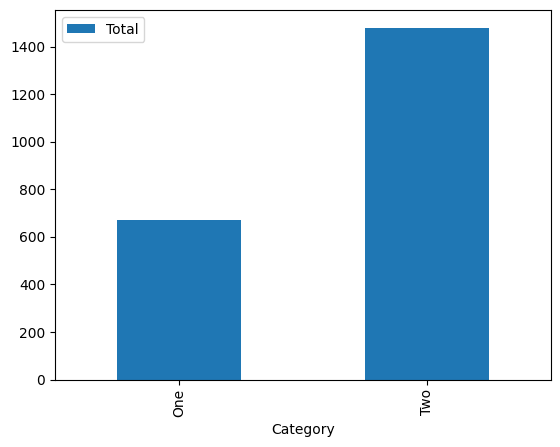

In [6]:
copy = data.copy()
del copy["ID"], copy["Discount"], copy["Name"], copy["Price"], copy["Amount"]
copy = copy.groupby(["Category"]).sum()
display(copy)
copy.plot.bar();

In [7]:
copy = data.copy()
del copy["ID"], copy["Discount"], copy["Price"], copy["Amount"]
copy = copy.groupby(["Category"]).max()

display(copy)

,Name,Total
Category,,
One,Third,420.0
Two,Sixth,1200.0


In [ ]:
options = set(data["Category"])

def on_category_change(Category):
    copy = data.copy()
    copy = copy[copy.Category == Category]
    copy = copy[copy.Discount == "Yes"]
    del copy["ID"], copy["Discount"], copy["Category"], copy["Price"]
    display(copy[copy.Amount != 0])

interact(on_category_change, Category=options);

interactive(children=(Dropdown(description='Category', options=('Two', 'One'), value='Two'), Output()), _dom_c…

In [9]:
print("Total sum: " + str(data["Total"].sum()))

Total sum: 2150.0


In [ ]:
options = set(data["Category"])
copy = copy.groupby(["Category"]).max()

def on_category_change(Category):
    copy = data.copy()
    copy = copy[copy.Category == Category]

    display(copy[copy.Amount == 0])

interact(on_category_change, Category=options);

interactive(children=(Dropdown(description='Category', options=('Two', 'One'), value='Two'), Output()), _dom_c…

In [11]:
class Assortment():
    def __init__(self, ID, name, category, discount):
        self.ID = ID
        self.name = name
        self.category = category
        self.discount = discount

    def __str__(self):
        return f"ID = {self.ID}\nName = {self.name}\nCategory = {self.category}\nDiscount = {self.discount}\n"

class Tarif():
    def __init__(self, ID, price):
        self.ID = ID
        self.price = price

    def __str__(self):
        return f"ID = {self.ID}\nPrice = {self.price}\n"

class Sales():
    def __init__(self, ID, amount):
        self.ID = ID
        self.amount = amount

    def __str__(self):
        return f"ID = {self.ID}\nAmount = {self.amount}\n"

In [12]:
assort = []
with open('assortment.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        assort.append(Assortment(*row))

tarif = []
with open('tarif.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        tarif.append(Tarif(*row))

sales = []
with open('sales1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        sales.append(Sales(*row))
with open('sales2.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        sales.append(Sales(*row))

In [13]:
# 1. Отримати у категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку, для кожної назви виручену суму у форматi:
# < назва товару - сума >.

categories = set([x.category for x in assort])
def on_category(change):
    for i in assort:
        for j in tarif:
            for k in sales:
                if i.category == change and int(k.amount) >= 0 and i.ID == k.ID == j.ID:
                    print(f"< {i.name} - {float(j.price)} >") if i.discount == "No" else \
                    print(f"< {i.name} - {float(j.price) / 2} >")

interact(on_category, change=categories);

interactive(children=(Dropdown(description='change', options=('Two', 'One'), value='Two'), Output()), _dom_cla…

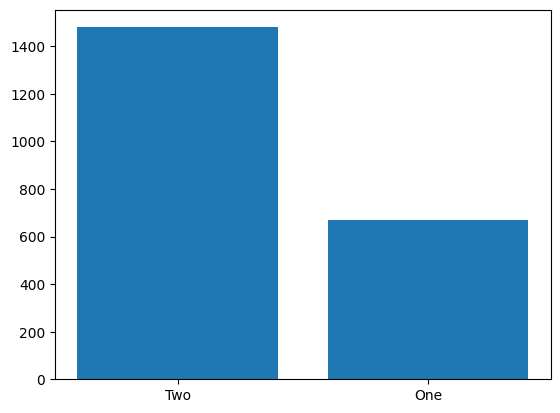

In [ ]:
# 2. Отримати для кожної категорiї ПРОДАНИХ товарiв виручену суму у форматi
# < категорiя - сума >.

result = {}
categories = set([x.category for x in assort])
for c in categories:
    sum = 0
    for i in assort:
        for j in tarif:
            for k in sales:
                if i.category == c and i.ID == k.ID == j.ID:
                    if i.discount == "No":
                        sum += float(j.price) * int(k.amount)
                    else:
                        sum += float(j.price) / 2 * int(k.amount)
    result[c] = sum
print(result)

plt.bar(range(len(result)), list(result.values()));
plt.xticks(range(len(result)), list(result.keys()));
plt.show()

In [15]:
# 3. Отримати у кожнiй категорiї ПРОДАНИХ товарiв назви товарiв з найбiльшою вирученою сумою у форматi 
# < назва товару - сума >

result = {}
categories = set([x.category for x in assort])
for c in categories:
    max = 0
    name = ''
    for i in assort:
        for j in tarif:
            for k in sales:
                if i.category == c and i.ID == k.ID == j.ID:
                    if i.discount == "No":
                        if max < float(j.price) * int(k.amount):
                            max = float(j.price) * int(k.amount)
                            name = i.name
                    else:
                        if max < float(j.price) * int(k.amount) / 2:
                            max = float(j.price) * int(k.amount) / 2
                            name = i.name
    result[name] = max
print(result)

{'Second': 1200.0, 'Fourth': 420.0}


In [16]:
# 4. У категорiї ПРОДАНИХ товарiв, яку вибирати з випадаючого списку для кожного з проданих товарiв акцiйної групи отримати кiлькiсть продаж та виручену суму

categories = set([x.category for x in assort])
def on_category(change):
    for i in assort:
        for j in tarif:
            for k in sales:
                if i.category == change and int(k.amount) >= 0 and i.ID == k.ID == j.ID and i.discount == "Yes":
                    print(f"< {i.name} - {k.amount} - {float(j.price) * int(k.amount) / 2} >")

interact(on_category, change=categories);

interactive(children=(Dropdown(description='change', options=('Two', 'One'), value='Two'), Output()), _dom_cla…

In [17]:
# 5. Отримати загальну суму ПРОДАНИХ товарiв.
sum = 0
for i in assort:
    for j in tarif:
        for k in sales:
            if i.ID == k.ID == j.ID:
                if i.discount == "No":
                    sum += float(j.price) * int(k.amount)
                else:
                    sum += float(j.price) / 2 * int(k.amount)
print("Total sum: " + str(sum))

Total sum: 2150.0


In [18]:
# 6. Отримати перелiк товарiв для кожної категорiї, якi не продавалися.
categories = set([x.category for x in assort])

for c in categories:
    print("Category - " + c)
    for i in assort:
        for j in tarif:
            for k in sales:
                if i.category == c and i.ID == k.ID == j.ID and int(k.amount) == 0:
                    print(f"{i}Price = {j.price}\n")

Category - Two
ID = 6
Name = Sixth
Category = Two
Discount = Yes
Price = 100

Category - One
ID = 3
Name = Third
Category = One
Discount = No
Price = 80

